Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📊 RESULTS: CONCEPTUAL DOMAIN ANALYSIS (N=994)

🔹 Top Source Domains (Vehicles of Imagery):
--------------------------------------------------
HUMAN CONDITION (Body & Self)                 | 299  | 30.1%
HUMAN ACTIVITIES (Social & Transactional)     | 254  | 25.6%
HUMAN CONSTRUCTS (Artifacts)                  | 180  | 18.1%
NATURE (Cosmic & Environmental)               | 161  | 16.2%
SENSORY PHENOMENA (Abstract)                  | 90   | 9.1%
ABSTRACT SYSTEMS (Law & History)              | 10   | 1.0%

🔹 Top Target Domains (Topics of Imagery):
--------------------------------------------------
DEEDS & BEHAVIOR (Ethics)                     | 213 
SPIRITUAL PSYCHOLOGY (Inner State)            | 211 
ESCHATOLOGY (Afterlife)                       | 120 
THEOLOGY (Divine Nature)                      | 115 
COSMOLOGY (Creation)             

/tmp/ipython-input-2266219152.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=source_counts.values, y=source_counts.index, palette="viridis")


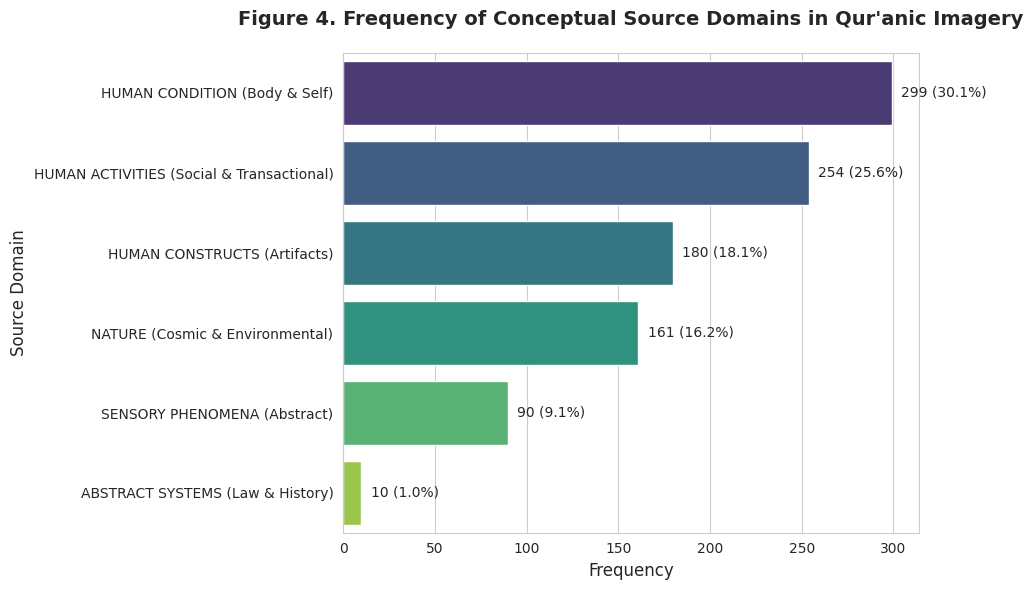

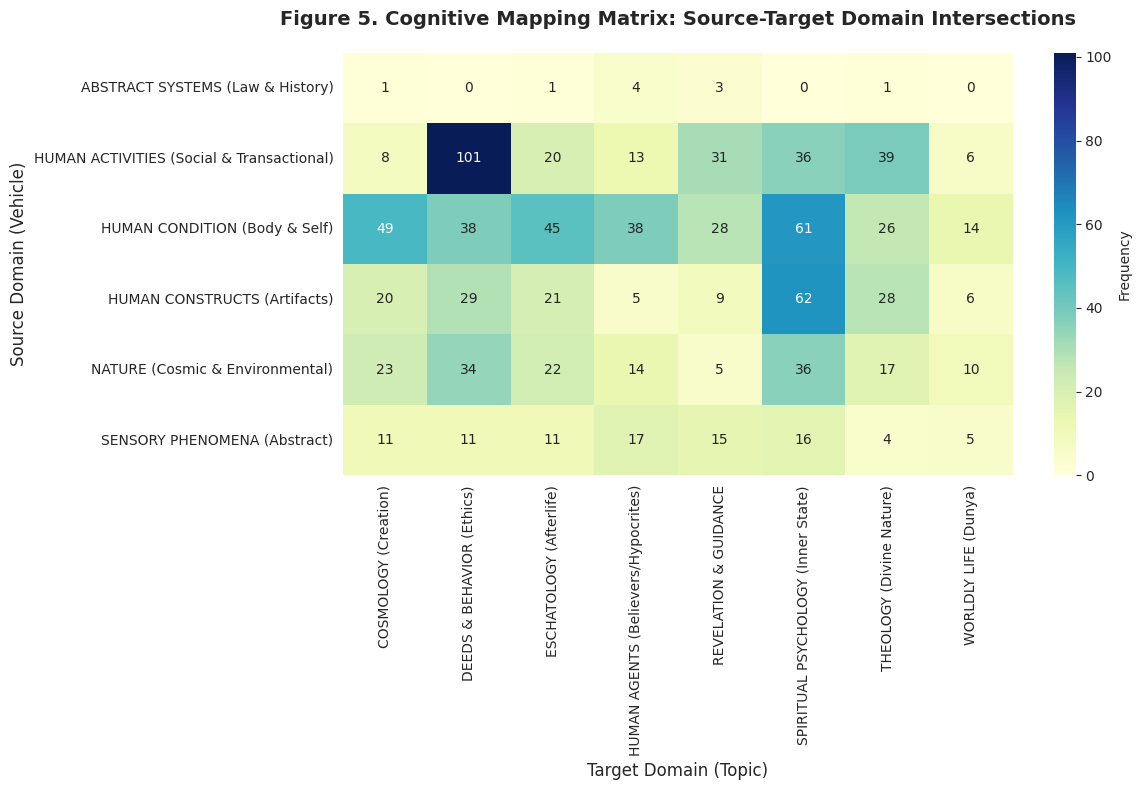

In [ ]:
# @title 4. تحليل الحقول المفهومية (Conceptual Domain Mapping)
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# ---------------------------------------------------------
# 1. MOUNT DRIVE & LOAD DATA
# ---------------------------------------------------------
print("Mounting Google Drive...")
drive.mount('/content/drive')

path_similes = '/content/drive/MyDrive/ Pragmatic/corpus/similes_data.json'
path_metaphors = '/content/drive/MyDrive/Pragmatic/corpus/metaphors_data.json'

# ---------------------------------------------------------
# 2. TAXONOMY MAPPING (الخريطة التصنيفية الموحدة)
# ---------------------------------------------------------

# A. Source Domain Mapping (من الفرعي إلى الرئيسي)
source_map = {
    # 1. NATURE
    'NATURE_ELEMENTS': 'NATURE (Cosmic & Environmental)',
    'NATURE_METEO_HYDRO': 'NATURE (Cosmic & Environmental)',
    'NATURE_FLORA': 'NATURE (Cosmic & Environmental)',
    'NATURE_FAUNA': 'NATURE (Cosmic & Environmental)',

    # 2. SENSORY_PHENOMENA
    'LIGHT_AND_DARKNESS': 'SENSORY PHENOMENA (Abstract)',
    'FIRE_AND_HEAT': 'SENSORY PHENOMENA (Abstract)',
    'SENSORY_PHENOMENA_LIGHT_AND_DARKNESS': 'SENSORY PHENOMENA (Abstract)',
    'SENSORY_PHENOMENA_FIRE_AND_HEAT': 'SENSORY PHENOMENA (Abstract)',
    'SOUND_AND_VOICE': 'SENSORY PHENOMENA (Abstract)',
    'SENSORY_PHENOMENA_SOUND_AND_VOICE': 'SENSORY PHENOMENA (Abstract)',

    # 3. HUMAN_ACTIVITIES
    'COMMERCE_AND_EXCHANGE': 'HUMAN ACTIVITIES (Social & Transactional)',
    'HUMAN_ACTIVITIES_COMMERCE_AND_EXCHANGE': 'HUMAN ACTIVITIES (Social & Transactional)',
    'WAR_AND_CONFLICT': 'HUMAN ACTIVITIES (Social & Transactional)',
    'HUMAN_ACTIVITIES_WAR_AND_CONFLICT': 'HUMAN ACTIVITIES (Social & Transactional)',
    'TRAVEL_AND_PATH': 'HUMAN ACTIVITIES (Social & Transactional)',
    'HUMAN_ACTIVITIES_TRAVEL_AND_PATH': 'HUMAN ACTIVITIES (Social & Transactional)',
    'AGRICULTURE_LABOR': 'HUMAN ACTIVITIES (Social & Transactional)',
    'HUMAN_ACTIVITIES': 'HUMAN ACTIVITIES (Social & Transactional)',

    # 4. HUMAN_CONSTRUCTS
    'BUILDINGS_AND_SHELTER': 'HUMAN CONSTRUCTS (Artifacts)',
    'CLOTHING_AND_ADORNMENT': 'HUMAN CONSTRUCTS (Artifacts)',
    'TOOLS_AND_ARTIFACTS': 'HUMAN CONSTRUCTS (Artifacts)',
    'HUMAN_CONSTRUCTS_TOOLS_AND_ARTIFACTS': 'HUMAN CONSTRUCTS (Artifacts)',

    # 5. HUMAN_CONDITION
    'BODY_AND_PHYSIOLOGY': 'HUMAN CONDITION (Body & Self)',
    'HUMAN_CONDITION_BODY_AND_PHYSIOLOGY': 'HUMAN CONDITION (Body & Self)',
    'FAMILY_AND_SOCIETY': 'HUMAN CONDITION (Body & Self)',
    'HUMAN_CONDITION_FAMILY_AND_SOCIETY': 'HUMAN CONDITION (Body & Self)',
    'PSYCHOLOGY_AND_EMOTION': 'HUMAN CONDITION (Body & Self)',
    'HUMAN_CONDITION_PSYCHOLOGY_AND_EMOTION': 'HUMAN CONDITION (Body & Self)',
    'HUMAN_CONDITION': 'HUMAN CONDITION (Body & Self)',

    # 6. ABSTRACT_SYSTEMS
    'ABSTRACT_SYSTEMS': 'ABSTRACT SYSTEMS (Law & History)',
    'HISTORY_AND_TRADITION': 'ABSTRACT SYSTEMS (Law & History)',
    'ABSTRACT_SYSTEMS_HISTORY_AND_TRADITION': 'ABSTRACT SYSTEMS (Law & History)',
    'DIVINE_LAWS': 'ABSTRACT SYSTEMS (Law & History)',
    'ABSTRACT_SYSTEMS_DIVINE_LAWS': 'ABSTRACT SYSTEMS (Law & History)'
}

# B. Target Domain Mapping (توحيد وتجميع)
target_map = {
    'THEOLOGY': 'THEOLOGY (Divine Nature)',
    'REVELATION_AND_GUIDANCE': 'REVELATION & GUIDANCE',
    'ESCHATOLOGY': 'ESCHATOLOGY (Afterlife)',
    'SPIRITUAL_PSYCHOLOGY': 'SPIRITUAL PSYCHOLOGY (Inner State)',
    'HUMAN_AGENTS_AND_GROUPS': 'HUMAN AGENTS (Believers/Hypocrites)',
    'DEEDS_AND_BEHAVIOR': 'DEEDS & BEHAVIOR (Ethics)',
    'WORLDLY_LIFE': 'WORLDLY LIFE (Dunya)',
    'COSMOLOGY_AND_NATURE': 'COSMOLOGY (Creation)'
}

# ---------------------------------------------------------
# 3. DATA PROCESSING
# ---------------------------------------------------------
def process_corpus(file_path, corpus_type):
    rows = []
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            records = json.load(f)

        for rec in records:
            items = rec.get('rhetorical_analysis', {}).get('similes', [])
            for item in items:
                comps = item.get('components', {})

                # استخراج القيم الخام
                raw_source = comps.get('source_domain')
                raw_target = comps.get('target_domain')

                # تطبيق الـ Mapping
                clean_source = source_map.get(raw_source, 'Other')
                clean_target = target_map.get(raw_target, 'Other')

                # إضافة فقط إذا كانت البيانات معروفة
                if clean_source != 'Other' and clean_target != 'Other':
                    rows.append({
                        'Corpus': corpus_type,
                        'Source Domain': clean_source,
                        'Target Domain': clean_target
                    })
    except Exception:
        pass
    return rows

# تحميل البيانات
data = process_corpus(path_similes, 'Simile') + process_corpus(path_metaphors, 'Metaphor')
df = pd.DataFrame(data)

# ---------------------------------------------------------
# 4. ANALYSIS & REPORT
# ---------------------------------------------------------
if not df.empty:
    print("\n" + "="*60)
    print(f"📊 RESULTS: CONCEPTUAL DOMAIN ANALYSIS (N={len(df)})")
    print("="*60)

    # 1. Source Domain Frequency
    source_counts = df['Source Domain'].value_counts()
    source_pct = df['Source Domain'].value_counts(normalize=True) * 100

    print("\n🔹 Top Source Domains (Vehicles of Imagery):")
    print("-" * 50)
    for dom, count in source_counts.items():
        print(f"{dom:<45} | {count:<4} | {source_pct[dom]:.1f}%")

    # 2. Target Domain Frequency
    target_counts = df['Target Domain'].value_counts()

    print("\n🔹 Top Target Domains (Topics of Imagery):")
    print("-" * 50)
    for dom, count in target_counts.items():
        print(f"{dom:<45} | {count:<4}")

    # --- Generated Commentary ---
    top_source = source_counts.idxmax()
    top_target = target_counts.idxmax()

    print("\n📝 [Generated Narrative for Section 4.1.2]:")
    print("-" * 60)
    print(f"The cognitive mapping analysis reveals that **{top_source}** is the most frequent source domain ({source_pct[top_source]:.1f}%), serving as the primary conceptual reservoir for Qur'anic imagery. "
          f"Conversely, **{top_target}** emerges as the most conceptualized target domain. "
          "This distribution highlights a fundamental cognitive strategy: grounding abstract spiritual realities in tangible, universally accessible environmental and social experiences.")
    print("-" * 60)

    # ---------------------------------------------------------
    # 5. VISUALIZATION 1: HORIZONTAL BAR CHART (Source Domains)
    # ---------------------------------------------------------
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    # رسم بياني أفقي للمجالات المصدر
    ax = sns.barplot(x=source_counts.values, y=source_counts.index, palette="viridis")

    plt.title('Figure 4. Frequency of Conceptual Source Domains in Qur\'anic Imagery', fontsize=14, weight='bold', pad=20)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Source Domain', fontsize=12)

    # إضافة الأرقام
    for i, v in enumerate(source_counts.values):
        ax.text(v + 5, i, f'{v} ({source_pct[source_counts.index[i]]:.1f}%)', va='center')

    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------
    # 6. VISUALIZATION 2: HEATMAP (Source vs. Target) - *مهم جداً*
    # ---------------------------------------------------------
    # إنشاء مصفوفة التقاطع
    cross_tab = pd.crosstab(df['Source Domain'], df['Target Domain'])

    plt.figure(figsize=(12, 8))
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap="YlGnBu", cbar_kws={'label': 'Frequency'})

    plt.title('Figure 5. Cognitive Mapping Matrix: Source-Target Domain Intersections', fontsize=14, weight='bold', pad=20)
    plt.ylabel('Source Domain (Vehicle)', fontsize=12)
    plt.xlabel('Target Domain (Topic)', fontsize=12)

    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No valid domain data found. Ensure 'components -> source_domain/target_domain' exists.")